O 데이터셋: https://images.cv/dataset/0-image-classification-dataset

X 데이터 셋은 폰트 생성 코드사용

데이터 개수 확인

In [6]:
import os

def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

directory_path = "/home/addinedu/dev_ws/data/xxxxx/x"
total_files = count_files_in_directory(directory_path)
print("폴더 내 데이터 개수:", total_files)


폴더 내 데이터 개수: 392


임의로 선택된 이미지 파일: ['x_334.jpg', 'x_281.jpg', 'x_380.jpg', 'x_90.jpg', 'x_368.jpg']


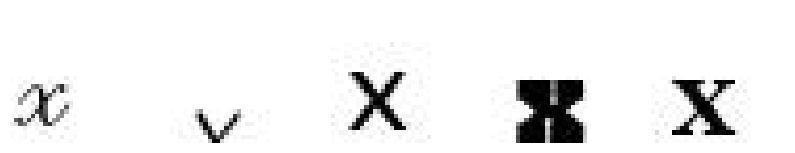

In [6]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

directory_path = "/home/addinedu/dev_ws/data/xxxxx/x"

def get_random_images(directory, num_images=5):
    image_files = [file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))]
    random_images = random.sample(image_files, min(num_images, len(image_files)))
    return random_images
def apply_grayscale(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image
# 임의의 5장 이미지 파일 추출
random_images = get_random_images(directory_path, num_images=5)
print("임의로 선택된 이미지 파일:", random_images)

# 이미지를 그레이 스케일로 변환하여 출력
plt.figure(figsize=(10, 6))
for i, img_name in enumerate(random_images, 1):
    img_path = os.path.join(directory_path, img_name)
    img = cv2.imread(img_path)
    # 그레이 스케일 적용
    gray_img = apply_grayscale(img)
    plt.subplot(1, 5, i)
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')

plt.show()

임의로 선택된 이미지 파일: ['gray-ZVGPFCGP8SGV.jpg', 'gray-D9K6ELU7X7RX.jpg', 'gray-MXMD2EXONVNG.jpg', 'gray-HGTU2IIKFCWW.jpg', 'gray-RVRRWRT76P0C.jpg']


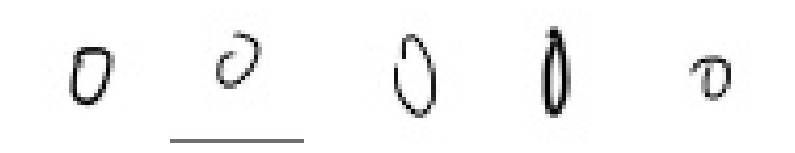

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

directory_path = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/OOOOO/math_symbols 0"

def get_random_images(directory, num_images=5):
    image_files = [file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))]
    random_images = random.sample(image_files, min(num_images, len(image_files)))
    return random_images
def apply_grayscale(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image
# 임의의 5장 이미지 파일 추출
random_images = get_random_images(directory_path, num_images=5)
print("임의로 선택된 이미지 파일:", random_images)

# 이미지를 그레이 스케일로 변환하여 출력
plt.figure(figsize=(10, 6))
for i, img_name in enumerate(random_images, 1):
    img_path = os.path.join(directory_path, img_name)
    img = cv2.imread(img_path)
    # 그레이 스케일 적용
    gray_img = apply_grayscale(img)
    plt.subplot(1, 5, i)
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')

plt.show()

리사이즈

In [15]:
import os
import cv2

source_folder = "/home/addinedu/dev_ws/data/X"

destination_folder = "/home/addinedu/dev_ws/data/new_0"

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

file_list = os.listdir(source_folder)

for file_name in file_list:
    source_file_path = os.path.join(source_folder, file_name)
    
    image = cv2.imread(source_file_path)
    
    if image is not None:
        resized_image = cv2.resize(image, (32, 32))
        
        destination_file_path = os.path.join(destination_folder, file_name)
        
        cv2.imwrite(destination_file_path, resized_image)


+-15 회전시켜서 데이터 증강


In [23]:
import cv2
import os

input_directory = "/home/addinedu/dev_ws/data/handwritten_dataset/train/x"
output_directory = "/home/addinedu/dev_ws/data/handwritten_dataset/train/x_new_train1000"
image_extension = ".jpg"

rotation_angles = range(-15, 16)

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for filename in os.listdir(input_directory):
    if filename.endswith(image_extension):
        image_path = os.path.join(input_directory, filename)
        image = cv2.imread(image_path)
        for angle in rotation_angles:
            rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
            rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
            output_filename = os.path.splitext(filename)[0] + "_rotated_" + str(angle) + image_extension
            output_path = os.path.join(output_directory, output_filename)
            cv2.imwrite(output_path, rotated_image)

print("이미지 회전 및 저장이 완료되었습니다.")


이미지 회전 및 저장이 완료되었습니다.


2024-05-14 14:21:46.246275: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 14:21:47.128450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


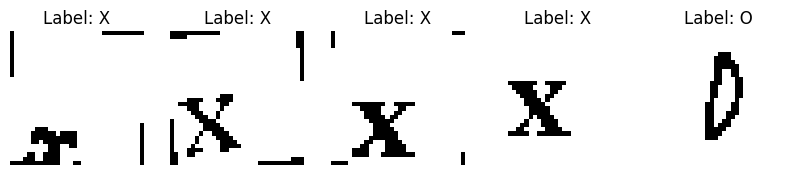

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os

# 데이터 경로
X_image_folder = "/home/addinedu/dev_ws/data/handwritten_dataset/train/x_new_train1000"
O_image_folder = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000"
X_label_csv_path = "/home/addinedu/dev_ws/data/handwritten_dataset/train/X2_labels.csv"
O_label_csv_path = "/home/addinedu/dev_ws/data/images.cv_cda9n6fio287zp8fuwsivo/data/new_train1000.csv"

def load_and_preprocess_image(image_path, grayscale=True, threshold=True):
    image = cv2.imread(image_path)
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 그레이 스케일 변환
    if threshold:
        _, image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)  # 이진화
    image = cv2.resize(image, (32, 32))  # 이미지 크기를 32x32로 조정
    image = image / 255.0  # 이미지를 0과 1 사이의 값으로 정규화
    return image.reshape((32, 32, 1 if grayscale else 3)) if not threshold else image.reshape((32, 32, 1))


def create_dataset(image_folder, label_csv_path, grayscale=True, threshold=True):
    label_df = pd.read_csv(label_csv_path)
    
    images = []
    labels = []

    for index, row in label_df.iterrows():
        image_path = os.path.join(image_folder, row["Image_Path"])
        label = row["Label"]
        image = load_and_preprocess_image(image_path, grayscale, threshold)
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

X_images, _ = create_dataset(X_image_folder, X_label_csv_path)
X_labels = np.zeros(len(X_images), dtype=int)  # X 이미지는 0으로 라벨링

O_images, _ = create_dataset(O_image_folder, O_label_csv_path)
O_labels = np.ones(len(O_images), dtype=int)  # O 이미지는 1로 라벨링

# 이미지 데이터와 라벨 데이터를 합치기
images = np.concatenate((X_images, O_images), axis=0)
labels = np.concatenate((X_labels, O_labels), axis=0)

X_train, X_val, y_train, y_val = train_test_split(images, labels, shuffle=True,test_size=0.2, random_state=13)

num_images_to_visualize = 5


plt.figure(figsize=(10, 5))
for i in range(num_images_to_visualize):
    idx = np.random.randint(0, len(images))
    
    image = images[idx]
    label = "X" if labels[idx] == 0 else "O"
    
    plt.subplot(1, num_images_to_visualize, i+1)
    plt.imshow(image.squeeze(), cmap='gray')  
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

지정영역 제외하고 흰색으로 만들기

In [26]:
import cv2
import os
import numpy as np

input_directory = "/home/addinedu/dev_ws/data/handwritten_dataset/train/x_new_train1000"
output_directory = "/home/addinedu/dev_ws/data/handwritten_dataset/train/a_x_new_train1000"
exclude_area = [(5, 5), (25, 25)]  # (x1, y1), (x2, y2)

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for filename in os.listdir(input_directory):
    image_path = os.path.join(input_directory, filename)
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    mask = np.zeros((height, width), dtype=np.uint8)
    cv2.rectangle(mask, exclude_area[0], exclude_area[1], (255), thickness=cv2.FILLED)
    result = np.where(mask[:, :, None] == 255, image, 255)
    output_path = os.path.join(output_directory, filename)
    cv2.imwrite(output_path, result)

print("이미지 처리가 완료되었습니다.")


이미지 처리가 완료되었습니다.


임의로 선택된 이미지 파일: ['x_247_rotated_4.jpg', 'x_70_rotated_10.jpg', 'x_143_rotated_-14.jpg', 'x_234_rotated_9.jpg', 'x_34_rotated_-11.jpg']


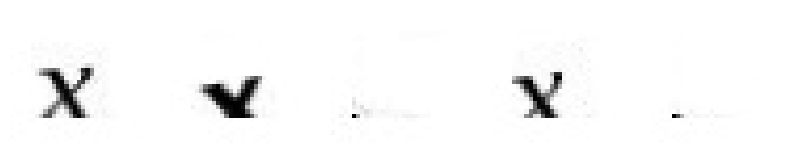

In [8]:
directory_path = "/home/addinedu/dev_ws/data/handwritten_dataset/train/a_x_new_train1000"

def get_random_images(directory, num_images=5):
    image_files = [file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))]
    random_images = random.sample(image_files, min(num_images, len(image_files)))
    return random_images
def apply_grayscale(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image
# 임의의 5장 이미지 파일 추출
random_images = get_random_images(directory_path, num_images=5)
print("임의로 선택된 이미지 파일:", random_images)

# 이미지를 그레이 스케일로 변환하여 출력
plt.figure(figsize=(10, 6))
for i, img_name in enumerate(random_images, 1):
    img_path = os.path.join(directory_path, img_name)
    img = cv2.imread(img_path)
    # 그레이 스케일 적용
    gray_img = apply_grayscale(img)
    plt.subplot(1, 5, i)
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')

plt.show()

데이터 라벨링 후 .csv로 저장

In [10]:
import os
import pandas as pd

image_folder = "/home/addinedu/dev_ws/data/xxxxx/x"
label = "1"

# 이미지 파일 목록
image_files = os.listdir(image_folder)

# 빈 리스트 생성
data = []

# 이미지 파일에 대해 반복하면서 라벨링
for image_file in image_files:
    # 이미지 파일 경로
    image_path = os.path.join(image_folder, image_file)
    # 이미지 파일 경로와 라벨을 튜플로 묶어 리스트에 추가
    data.append((image_path, label))

# 리스트를 데이터프레임으로 변환
df = pd.DataFrame(data, columns=["Image_Path", "Label"])

# 라벨링된 데이터를 CSV 파일로 저장
output_csv_path = "/home/addinedu/dev_ws/data/xxxxx/x_labels.csv"
df.to_csv(output_csv_path, index=False)

print("라벨링이 완료되었습니다. 라벨링된 데이터는", output_csv_path, "에 저장되었습니다.")


라벨링이 완료되었습니다. 라벨링된 데이터는 /home/addinedu/dev_ws/data/xxxxx/x_labels.csv 에 저장되었습니다.


라벨링2

In [4]:
import os
import pandas as pd

# 이미지 파일이 있는 폴더 경로
image_folder = "/home/addinedu/dev_ws/data/ox_images/test"

# 이미지 파일 목록
image_files = os.listdir(image_folder)

# 라벨과 이미지 파일명을 저장할 리스트
labels = []
file_names = []

# 각 이미지 파일의 첫 글자를 라벨로 하여 저장
for image_file in image_files:
    label = image_file[0]  # 파일명의 첫 글자를 라벨로 설정
    labels.append(label)
    file_names.append(image_file)

# 데이터프레임 생성
data = pd.DataFrame({"File_Name": file_names, "Label": labels})

# CSV 파일로 저장
output_csv_path = "/home/addinedu/dev_ws/data/ox_images/test_labels.csv"
data.to_csv(output_csv_path, index=False)

print("라벨링된 데이터가 CSV 파일로 저장되었습니다:", output_csv_path)


라벨링된 데이터가 CSV 파일로 저장되었습니다: /home/addinedu/dev_ws/data/ox_images/train_labels.csv


라벨링(이미지 파일의 첫글자를 라벨로 함) >> 숫자로 'O'면 0으로 그 이외는 1

In [2]:
import os
import pandas as pd

# 이미지 파일이 있는 폴더 경로
image_folder = "/home/addinedu/dev_ws/data/ox_images/test"

# 이미지 파일 목록
image_files = os.listdir(image_folder)

# 라벨과 이미지 파일명을 저장할 리스트
labels = []
file_names = []

# 각 이미지 파일의 첫 글자를 라벨로 하여 저장
for image_file in image_files:
    label = 0 if image_file[0] == 'O' else 1
    labels.append(label)
    file_names.append(image_file)

# 데이터프레임 생성
data = pd.DataFrame({"File_Name": file_names, "Label": labels})

# CSV 파일로 저장
output_csv_path = "/home/addinedu/dev_ws/data/ox_images/test_labels.csv"
data.to_csv(output_csv_path, index=False)

print("라벨링된 데이터가 CSV 파일로 저장되었습니다:", output_csv_path)


라벨링된 데이터가 CSV 파일로 저장되었습니다: /home/addinedu/dev_ws/data/ox_images/test_labels.csv


라벨링확인


In [12]:
import os
import cv2
import random
import pandas as pd

image_folder = "/home/addinedu/dev_ws/data/ox_images/train"
label_csv_path = "/home/addinedu/dev_ws/data/ox_images/train_labels.csv"

label_df = pd.read_csv(label_csv_path)

image_files = os.listdir(image_folder)

random_index = random.randint(0, len(image_files) - 1)
image_file = image_files[random_index]
label = label_df.loc[label_df['File_Name'] == image_file, 'Label'].iloc[0]

image_path = os.path.join(image_folder, image_file)
image = cv2.imread(image_path)

cv2.putText(image, label, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2.imshow("Image with Label", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


라벨링 확인

In [11]:
import pandas as pd

# 라벨링된 CSV 파일 경로
csv_file_path = "/home/addinedu/dev_ws/data/xxxxx/x_labels.csv"

# CSV 파일 로드
df = pd.read_csv(csv_file_path)

# 데이터프레임 출력
print(df.head())


                                     Image_Path  Label
0  /home/addinedu/dev_ws/data/xxxxx/x/x_311.jpg      1
1  /home/addinedu/dev_ws/data/xxxxx/x/x_131.jpg      1
2  /home/addinedu/dev_ws/data/xxxxx/x/x_120.jpg      1
3  /home/addinedu/dev_ws/data/xxxxx/x/x_381.jpg      1
4  /home/addinedu/dev_ws/data/xxxxx/x/x_309.jpg      1
